In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import numpy as np

from matplotlib_venn import venn3_unweighted, venn3_circles
from collections import Counter

In [4]:
def plot_bar_frequencies(labels, frequencies, title, x_max=20, step_size=2, fig_size=(6.4, 4.8)):
    plt.figure(figsize=fig_size)
    plt.barh(labels, frequencies, color = 'lightgray', edgecolor = 'black')

    for index, value in enumerate(frequencies):
        plt.text(value, index - 0.05, "  " + str(value))

    # https://stackoverflow.com/questions/46795840/matplotlib-float-values-on-the-axis-instead-of-integers
    locator = ticker.MultipleLocator(step_size)
    plt.gca().xaxis.set_major_locator(locator)
    formatter = ticker.StrMethodFormatter("{x:.0f}")
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.xlim([0, x_max])
    plt.savefig(f'figures/{title}.pdf', bbox_inches='tight')

In [42]:
def plot_venn_3_frequencies(labels, subset_frequencies, title, subset_areas=None, fig_size=(6.4, 4.8)):
    label_colors = ['lightblue', 'limegreen', 'tomato']
    plt.figure(figsize=fig_size)

    circles = venn3_unweighted(
        subsets=subset_frequencies,
        subset_areas=subset_areas if subset_areas else subset_frequencies,
        set_labels=labels,
        alpha=1,
        set_colors=label_colors
    )
    venn3_circles(
        subsets=subset_areas if subset_areas else subset_frequencies,
        alpha = 0.5
    )
    for idx, subset in enumerate(circles.set_labels):
         circles.set_labels[idx].set_visible(False)

    plt.legend(
        handles=[mpatches.Patch(color=label_colors[i], label=label) for i, label in enumerate(labels)],
        bbox_to_anchor=(1, 1),
        bbox_transform=plt.gcf().transFigure
    )
    
    plt.savefig(f'figures/{title}.pdf')

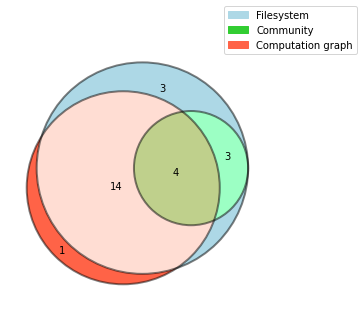

In [43]:
plot_venn_3_frequencies(
    ['Filesystem', 'Community', 'Computation graph'],
    [3, 0, 3, 1, 14, 0, 4],
    'ros_ecosystem_level',
    [3, 0, 3, 2, 14, 0, 4],
)

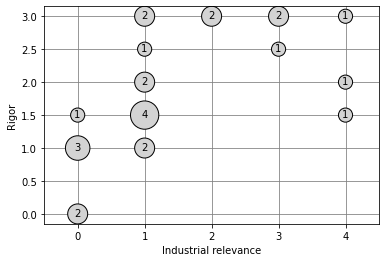

In [34]:
import numpy as np

# create data
rigor = [0, 1, 1, 1.5, 1.5, 1.5, 2, 2, 2.5, 2.5, 3, 3, 3, 3]
relevance = [0, 0, 1, 0, 1, 4, 1, 4, 1, 3, 1, 2, 3, 4]
frequencies = np.array([2, 3, 2, 1, 4, 1, 2, 1, 1, 1, 2, 2, 2, 1])

fig = plt.figure()    
ax = fig.add_subplot(1,1,1)
ax.yaxis.grid(color='gray')
ax.xaxis.grid(color='gray')
ax.set_axisbelow(True)
 
# Change color with c and alpha
plt.scatter(relevance, rigor, s=frequencies*200, c="lightgray", edgecolor="black")

for relevance_val, rigor_val, frequency_val in zip(relevance, rigor, frequencies):
    plt.text(relevance_val - 0.05, rigor_val - 0.03, frequency_val)

locator = ticker.MultipleLocator(1)
plt.gca().xaxis.set_major_locator(locator)
formatter = ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlim([-0.5, 4.5])
plt.ylabel('Rigor')
plt.xlabel('Industrial relevance')
#plt.show()
plt.savefig('figures/rigor_relevance.pdf', bbox_inches='tight')

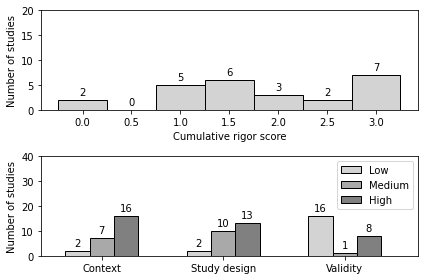

In [21]:
total_scores = [0, 0.5, 1, 1.5, 2, 2.5, 3]
no_of_studies = [2, 0, 5, 6, 3, 2, 7]

labels = ['Context', 'Study design', 'Validity']
score_low = [2, 2, 16]
score_med = [7, 10, 1]
score_high = [16, 13, 8]

x = np.arange(len(labels))
width = 0.20

fig, (ax1, ax2) = plt.subplots(2)

rects = ax1.bar(total_scores, no_of_studies, 0.5, color='lightgray', edgecolor="black") 
ax1.set_ylabel('Number of studies')
ax1.set_xlabel('Cumulative rigor score')

rects1 = ax2.bar(x - width, score_low, width, label='Low', color='lightgray', edgecolor="black")
rects2 = ax2.bar(x, score_med, width, label='Medium', color='darkgray', edgecolor="black")
rects3 = ax2.bar(x + width, score_high, width, label='High', color='gray', edgecolor="black")

ax2.set_ylabel('Number of studies')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()


def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects, ax1)        
autolabel(rects1, ax2)
autolabel(rects2, ax2)
autolabel(rects3, ax2)

ax1.set_ylim(0, 20)
ax2.set_ylim(0, 40)
ax2.set_xlim(-0.5, 2.6)

fig.tight_layout()

plt.savefig('figures/rigor_score.pdf', bbox_inches='tight')